In [5]:
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [9]:
admin = pd.read_csv('C:\\Users\\HP\\Documents\\adm_data.csv', index_col = 0)

In [10]:
admin

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


We can see there are some numerical and integer number

But, let us confirm to see what the data is telling us

In [11]:
admin.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


It appears this dataset has 400 row based on the count

but we need to find out from the dataset instead of instinct

# Looking for missing value

In [12]:
print(admin.isnull())

            GRE Score  TOEFL Score  University Rating    SOP   LOR    CGPA  \
Serial No.                                                                   
1               False        False              False  False  False  False   
2               False        False              False  False  False  False   
3               False        False              False  False  False  False   
4               False        False              False  False  False  False   
5               False        False              False  False  False  False   
...               ...          ...                ...    ...    ...    ...   
396             False        False              False  False  False  False   
397             False        False              False  False  False  False   
398             False        False              False  False  False  False   
399             False        False              False  False  False  False   
400             False        False              False  False  Fa

So, there are no null value, but we need to make sure any abbreviation makes sense

We know what GRE, TOEFL, University Rating, Research, Chance of Admit mean but what about SOP, LOR, CGPA SOP = Statement of Purpose LOR = Letter of Recommendation CGPA = Cummulative Grade Point Average. Serial No is just a number for each student

# Let us do the heatmap

<AxesSubplot:>

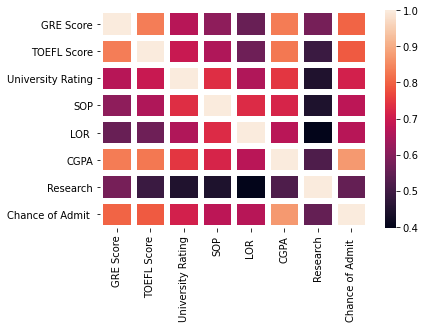

In [14]:
newadmin = admin
sns.heatmap(newadmin.corr(), linewidths = 5, linecolor = "white")

In all the criteria mentioned above, research has little correlation to being admitted to university
In fact, the highest correlation research has, is 60%. But of course research is 100% correlated to research
I just did a pairplot earlier, so we are going to do another one

# Distribution of GRE, TOEFL, CGPA, University Rating are as follow¶

Text(0.5, 0.98, 'GRE Score')

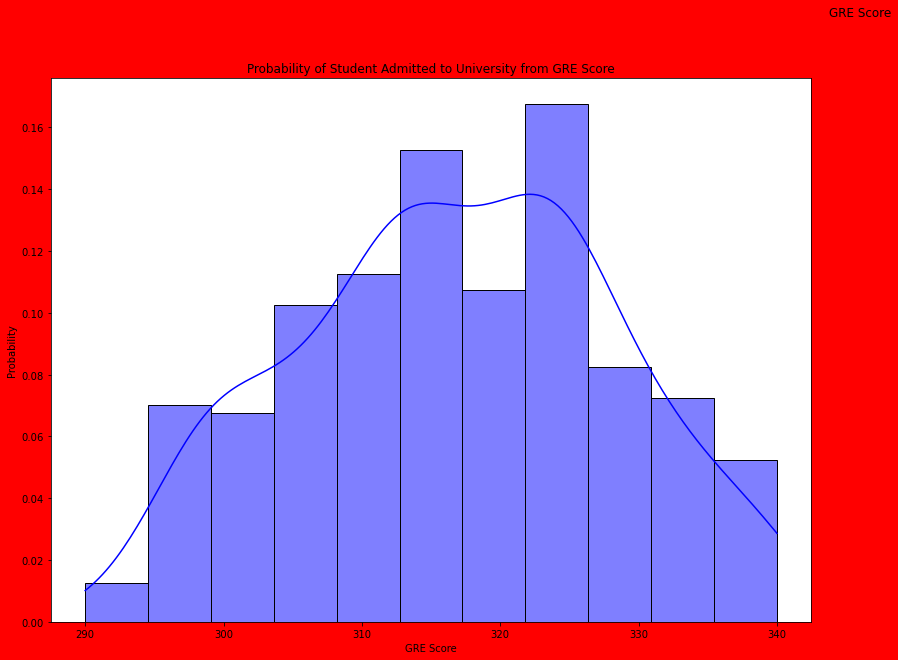

In [15]:
plt.figure(figsize = (30,10), facecolor = "red")
plt.subplot(1,2,1)
sns.histplot(x = admin['GRE Score'], data = newadmin, multiple = "layer",
             color ="blue", bins = "auto", stat = 'probability',
            kde = True, legend = True, fill = True, lw = 1)

plt.title("Probability of Student Admitted to University from GRE Score")
plt.suptitle("GRE Score")

Text(0.5, 1.0, 'Number of Admitted Students based on GRE Score')

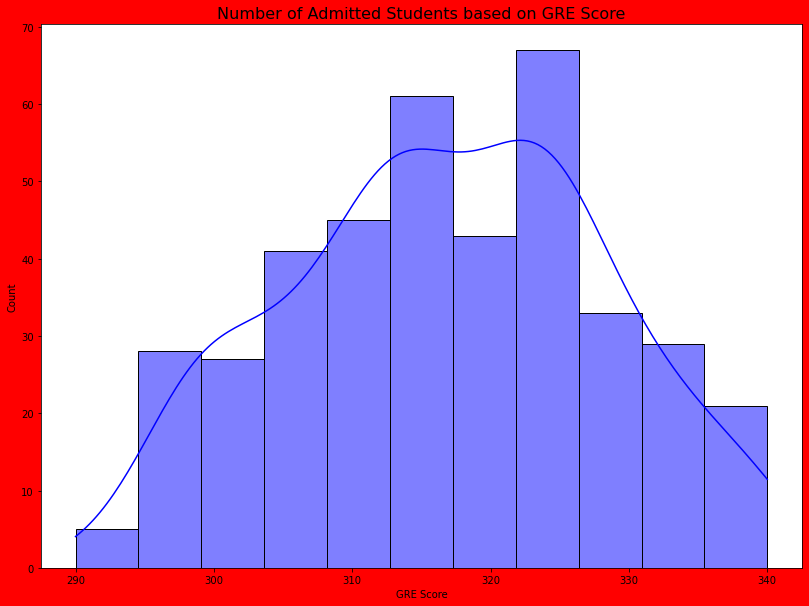

In [18]:
plt.figure(figsize = (30,10), facecolor = "red")
plt.subplot(1,2,1)
sns.histplot(x = admin['GRE Score'], data = newadmin, multiple = "layer",
             color ="blue", bins = "auto", stat = 'count',
            kde = True, legend = True, fill = True, lw = 1)
fontsize = 16
plt.title("Number of Admitted Students based on GRE Score", fontdict = {'fontsize': fontsize})

Text(0.5, 1.0, 'Number of Admitted Students based on TOEFL Score')

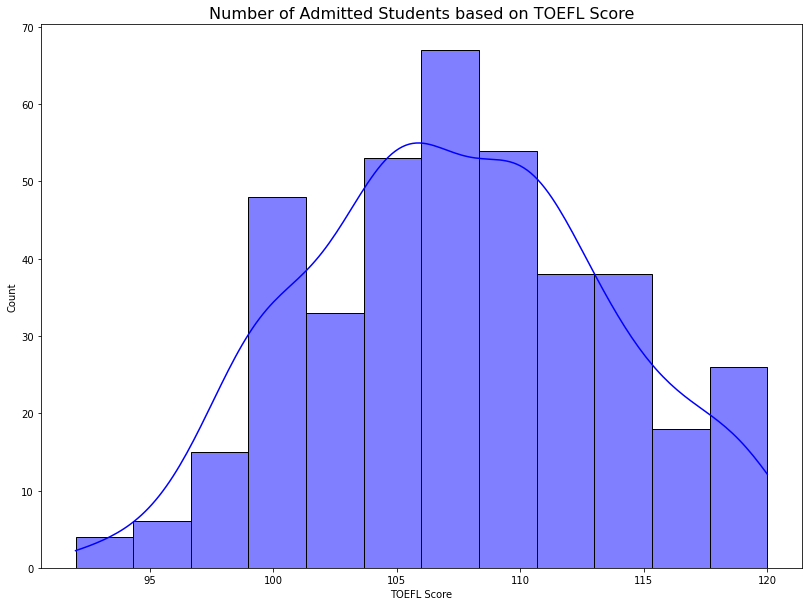

In [19]:
plt.figure(figsize = (30,10() facecolor = "red"))
plt.subplot(1,2,1)
sns.histplot(x = admin['TOEFL Score'], data = newadmin, multiple = "layer",
             color ="blue", bins = "auto", stat = 'count',
            kde = True, legend = True, fill = True, lw = 1)
fontsize = 16
plt.title("Number of Admitted Students based on TOEFL Score", fontdict = {'fontsize': fontsize})

Text(0.5, 1.0, 'Number of Admitted Students based on their Cummulative GPA Score')

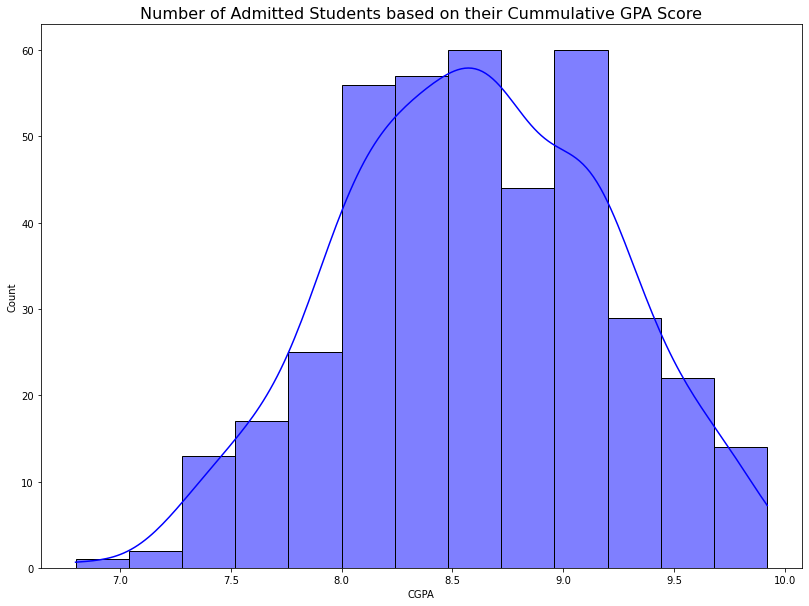

In [20]:
plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
sns.histplot(x = admin['CGPA'], data = newadmin, multiple = "layer",
             color ="blue", bins = "auto", stat = 'count',
            kde = True, legend = True, fill = True, lw = 1)
fontsize = 16
plt.title("Number of Admitted Students based on their Cummulative GPA Score", fontdict = {'fontsize': fontsize})

Text(0.5, 1.0, 'Percentage of Admitted based on University Rating')

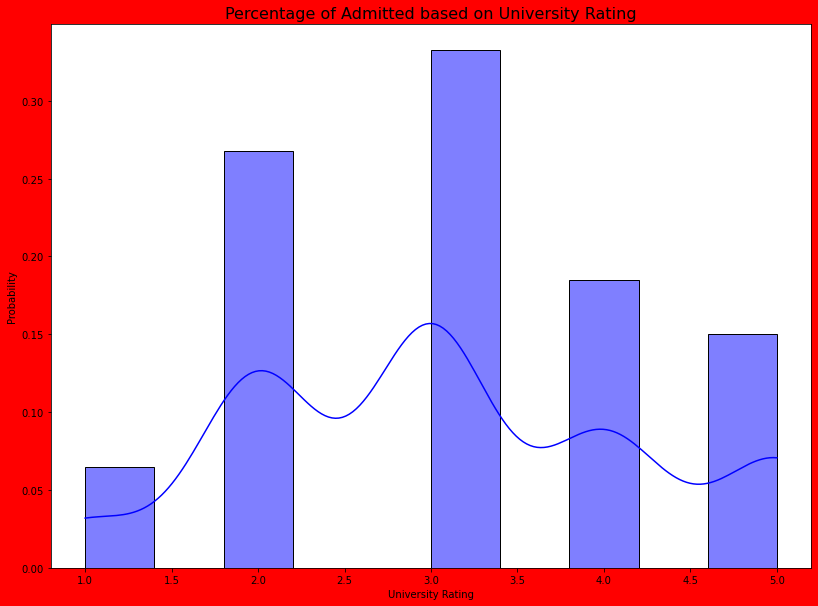

In [21]:
plt.figure(figsize = (30,10), facecolor = "red")
plt.subplot(1,2,1)
sns.histplot(x = admin['University Rating'], data = newadmin, multiple = "layer",
             color ="blue", bins = "auto", stat = 'probability',
            kde = True, legend = True, fill = True, lw = 1)
fontsize = 16
plt.title("Percentage of Admitted based on University Rating", fontdict = {'fontsize': fontsize})

Text(0.5, 1.0, 'Number of Admitted Students based on University Rating')

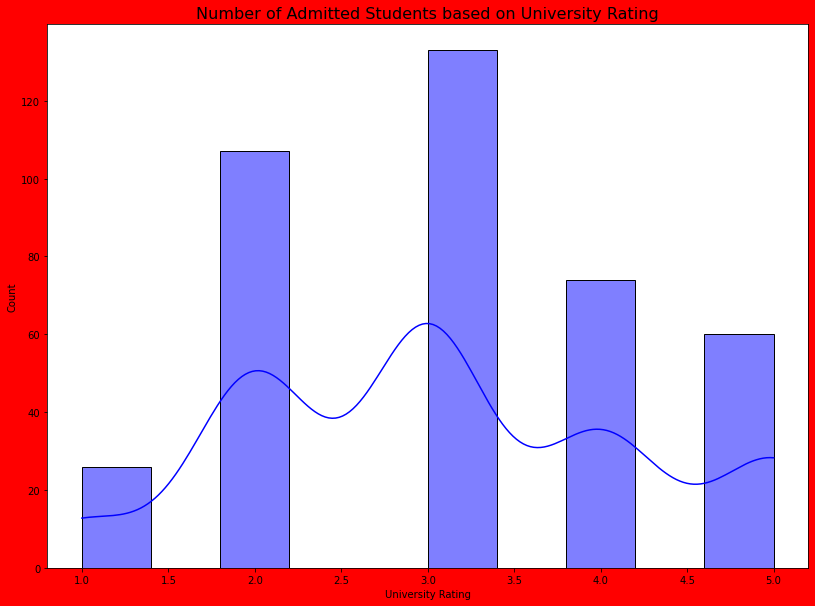

In [22]:
plt.figure(figsize = (30,10), facecolor = "red")
plt.subplot(1,2,1)
sns.histplot(x = admin['University Rating'], data = newadmin, multiple = "layer",
             color ="blue", bins = "auto", stat = 'count',
            kde = True, legend = True, fill = True, lw = 1)
fontsize = 16
plt.title("Number of Admitted Students based on University Rating", fontdict = {'fontsize': fontsize})

# Comparison of Students' CGPA, TOEFL, and GRE Score with the University Rating

Text(0.5, 0.98, 'GRE Score VS University Rating')

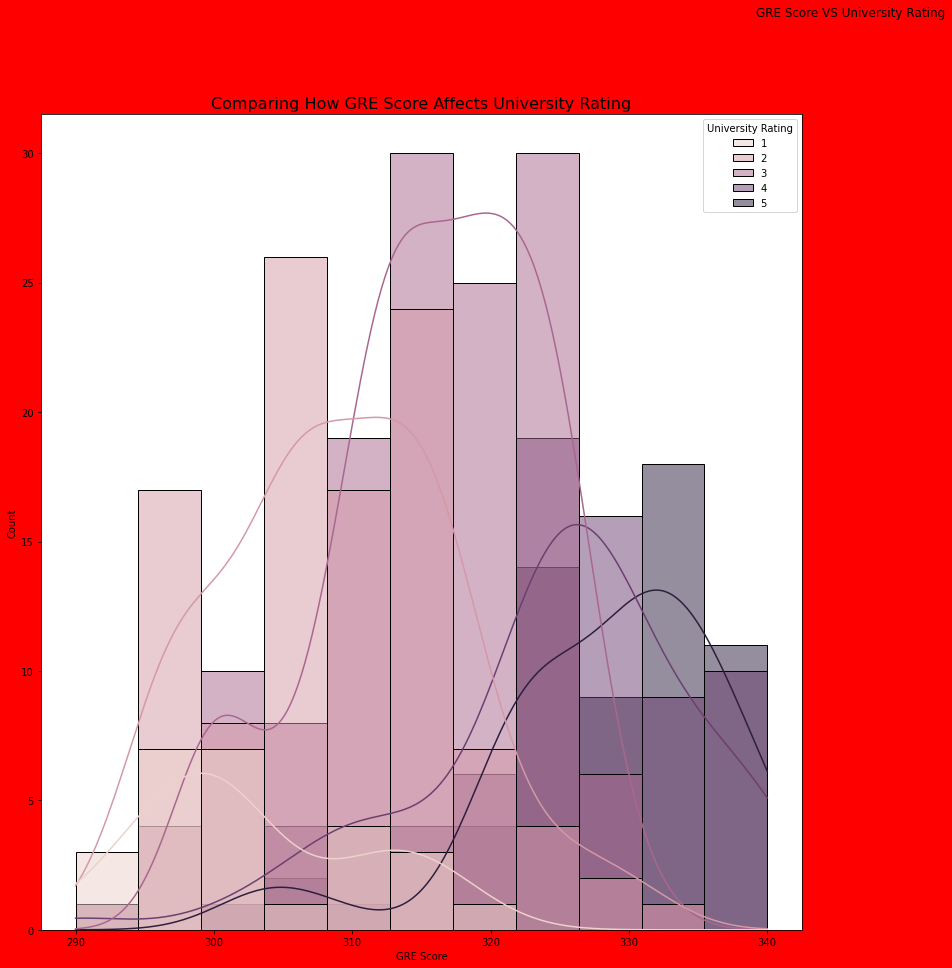

In [25]:
plt.figure(figsize = (30, 15), facecolor = "red")
plt.subplot(1,2,1)
sns.histplot(data = newadmin, x = newadmin['GRE Score'], hue = newadmin['University Rating'],
            color = "blue", fill = True, legend = True, lw = 1, kde = True)
fontsize = 16
plt.title("Comparing How GRE Score Affects University Rating", fontdict = {'fontsize': fontsize})
plt.suptitle("GRE Score VS University Rating")

Text(0.5, 0.98, 'CGPA vs University Rating')

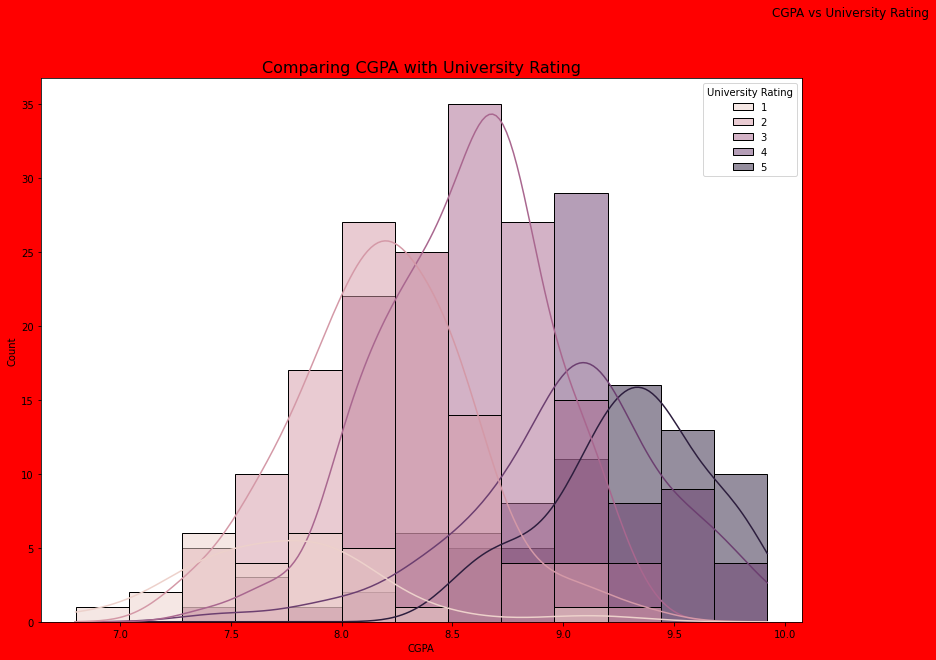

In [26]:
plt.figure(figsize = (30, 10), facecolor = "red")
plt.subplot(1, 2, 1)
sns.histplot(data = newadmin, x = newadmin['CGPA'], hue = newadmin['University Rating'],
            kde = True)
fontsize = 16
plt.title("Comparing CGPA with University Rating", fontdict = {'fontsize': fontsize})
plt.suptitle("CGPA vs University Rating")

Text(0.5, 0.98, 'TOEFL vs University Rating')

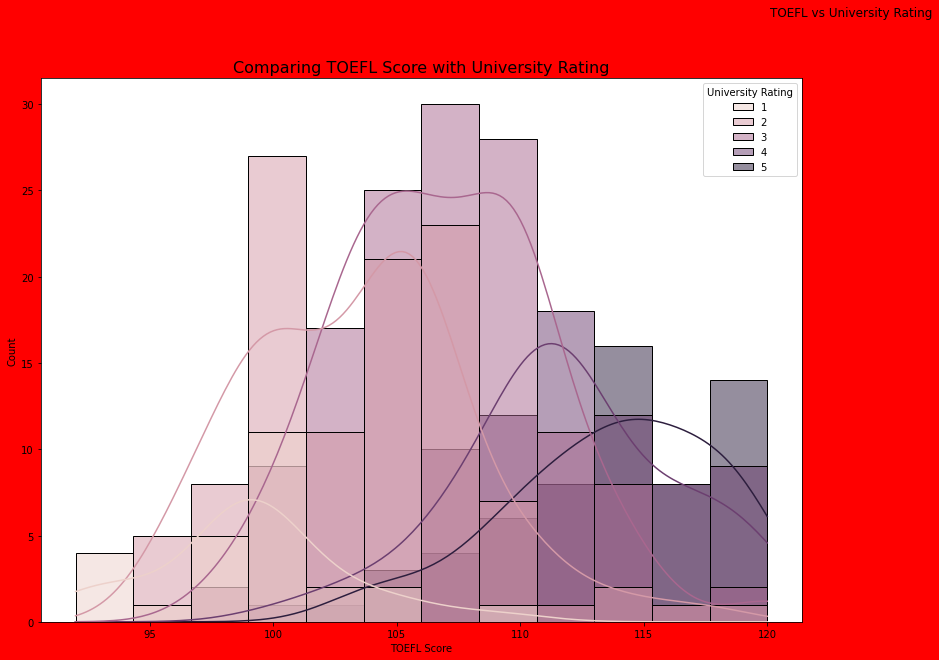

In [29]:
plt.figure(figsize = (30, 10), facecolor = "red")
plt.subplot(1, 2, 1)
sns.histplot(data = newadmin, x = newadmin['TOEFL Score'], hue = newadmin['University Rating'], 
            kde = True)
fontsize = 16
plt.title("Comparing TOEFL Score with University Rating", fontdict = {'fontsize': fontsize})
plt.suptitle("TOEFL vs University Rating")

I was only looking at the attributes that are most relevant from the heatmap
So, we can say that research does not help with admission,
Letter of recommendation, Statement of purpose sort of help with the admission but not very significant to say the least

# How about some regression
How about we do some regression to see how your chance of admission works with your Cummulative GPA, TOEFL, and GRE Score, and all the other attribute to see what they look like

In [30]:
print(newadmin.head(3))


            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   

            Research  Chance of Admit   
Serial No.                              
1                  1              0.92  
2                  1              0.76  
3                  1              0.72  


Text(0.5, 1.0, 'TOEFL Vs GRE Score with respect to University Rating')

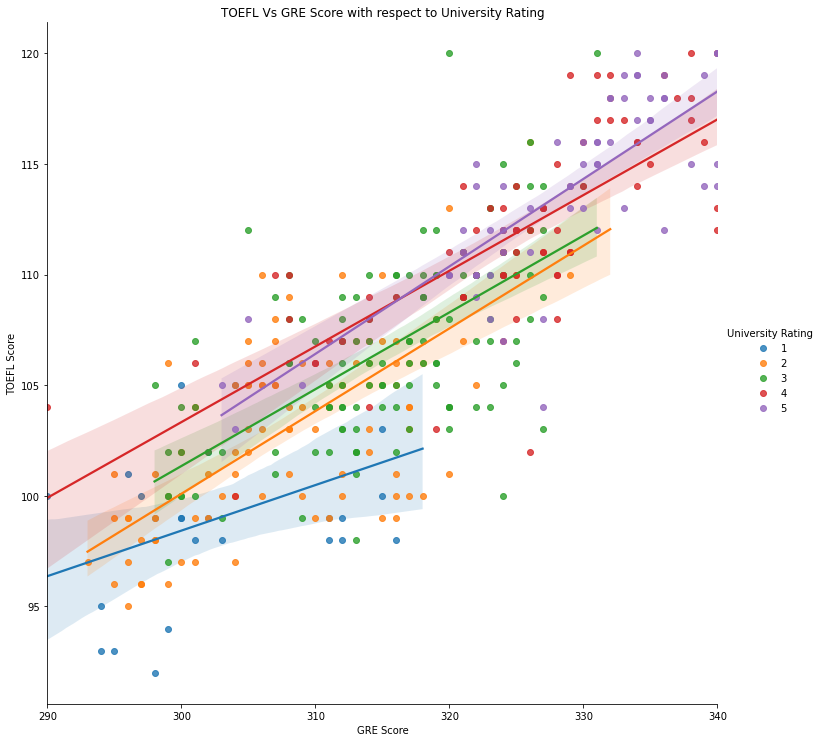

In [31]:
sns.lmplot(x = 'GRE Score', y = 'TOEFL Score', data = newadmin, 
            hue = 'University Rating', height = 10)
plt.title("TOEFL Vs GRE Score with respect to University Rating")

Text(0.5, 1.0, 'CGPA vs GRE Score with respect to Research')

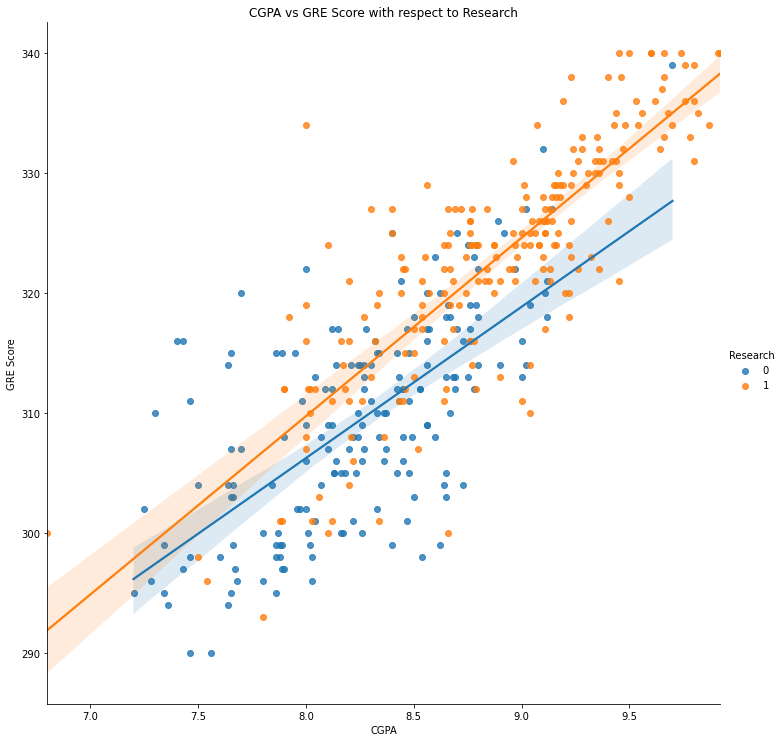

In [32]:
sns.lmplot(x = 'CGPA', y = 'GRE Score', data = newadmin,
          hue = 'Research', height = 10)
plt.title("CGPA vs GRE Score with respect to Research")

Text(0.5, 1.0, 'CGPA vs GRE Score with respect to University Rating')

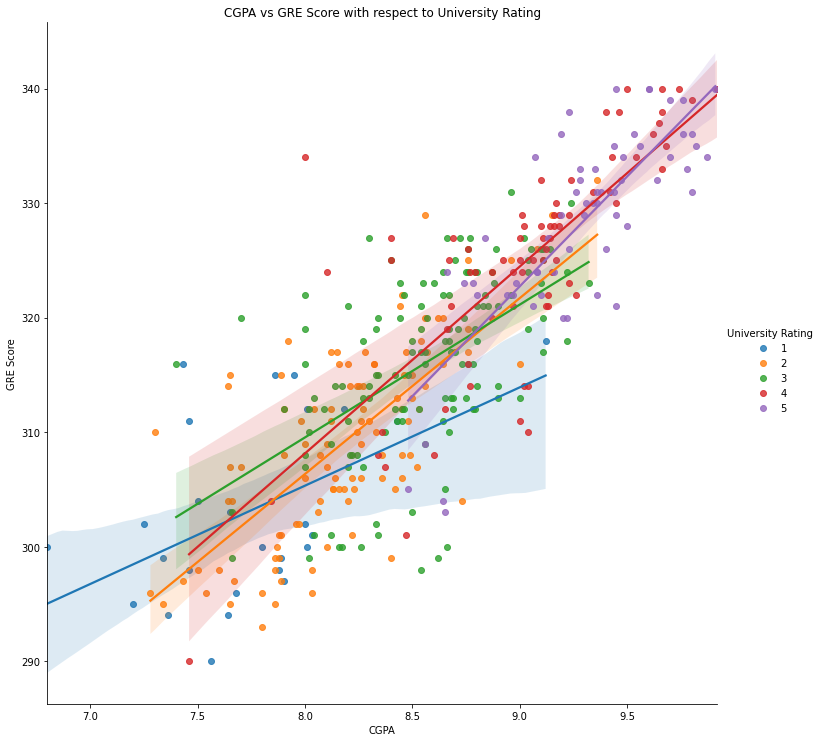

In [33]:
sns.lmplot(x = 'CGPA', y = 'GRE Score', data = newadmin,
          hue = 'University Rating', height = 10)
plt.title("CGPA vs GRE Score with respect to University Rating")

Text(0.5, 1.0, 'CGPA vs TOEFL Score with respect to University Rating')

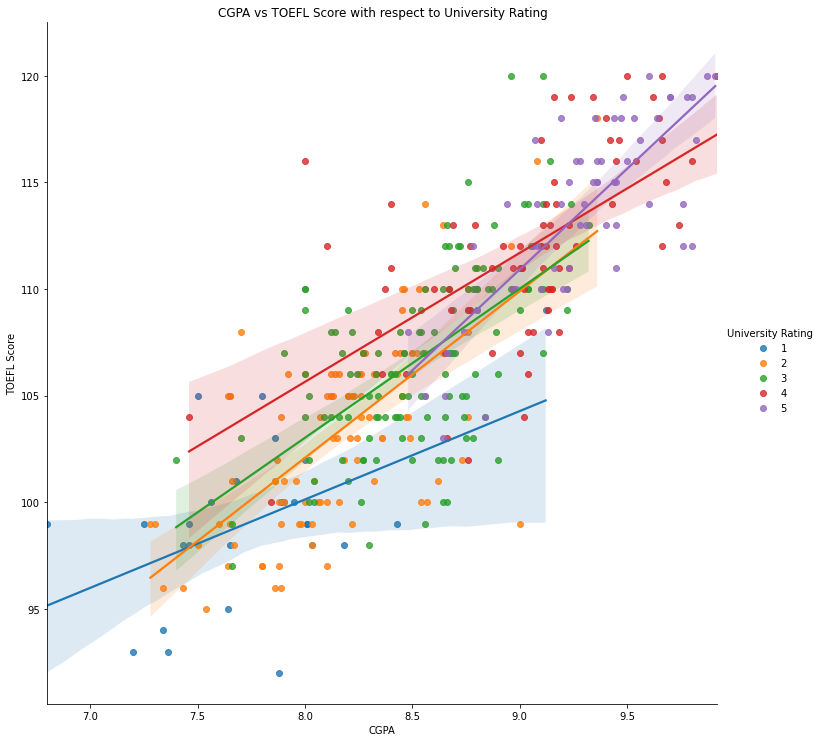

In [34]:
sns.lmplot(x = 'CGPA', y = 'TOEFL Score', data = newadmin,
          hue = 'University Rating', height = 10)
plt.title("CGPA vs TOEFL Score with respect to University Rating")


Text(0.5, 1.0, 'CGPA vs TOEFL with respect to Research')

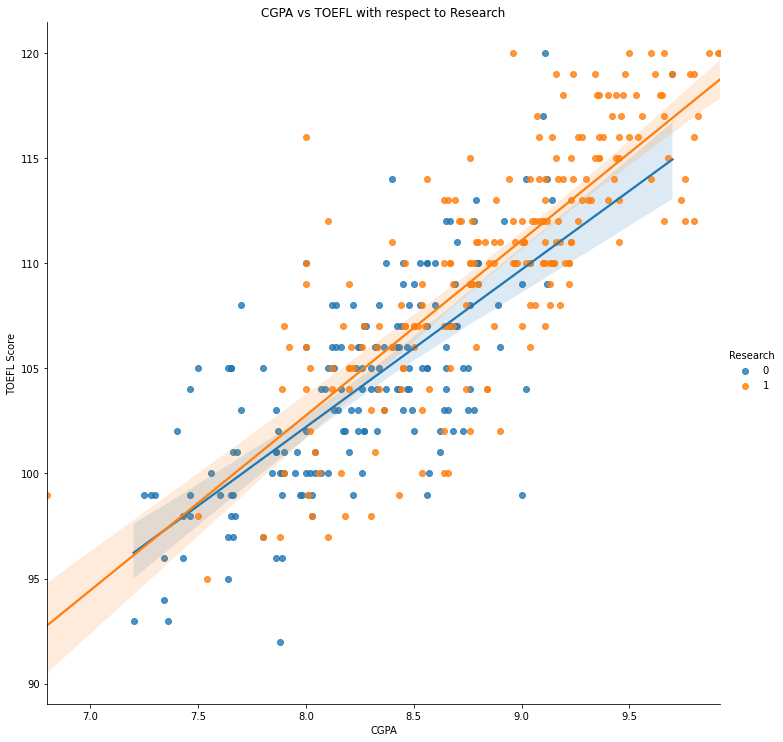

In [35]:
sns.lmplot(x = 'CGPA', y = 'TOEFL Score', data = newadmin,
          hue = 'Research', height = 10)
plt.title("CGPA vs TOEFL with respect to Research")

Text(0.5, 1.0, 'GRE vs TOEFL Score with respect to Research')

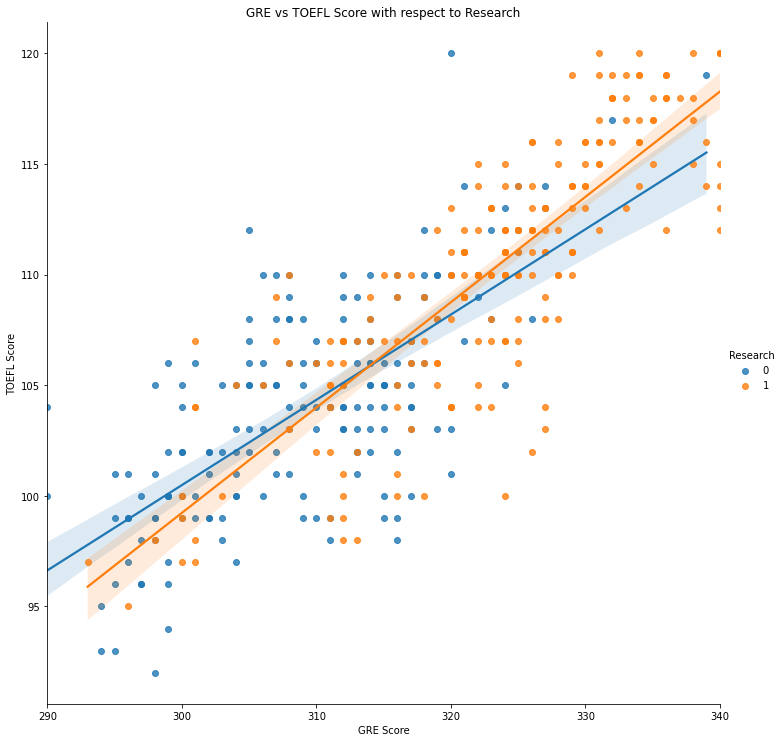

In [36]:
sns.lmplot(x = 'GRE Score', y = 'TOEFL Score', data = newadmin,
          hue = 'Research', height = 10)
plt.title("GRE vs TOEFL Score with respect to Research")

            Chance of Admit 
Serial No.                  
1                       0.92
2                       0.76
3                       0.72
4                       0.80
5                       0.65
...                      ...
396                     0.82
397                     0.84
398                     0.91
399                     0.67
400                     0.95

[400 rows x 1 columns]


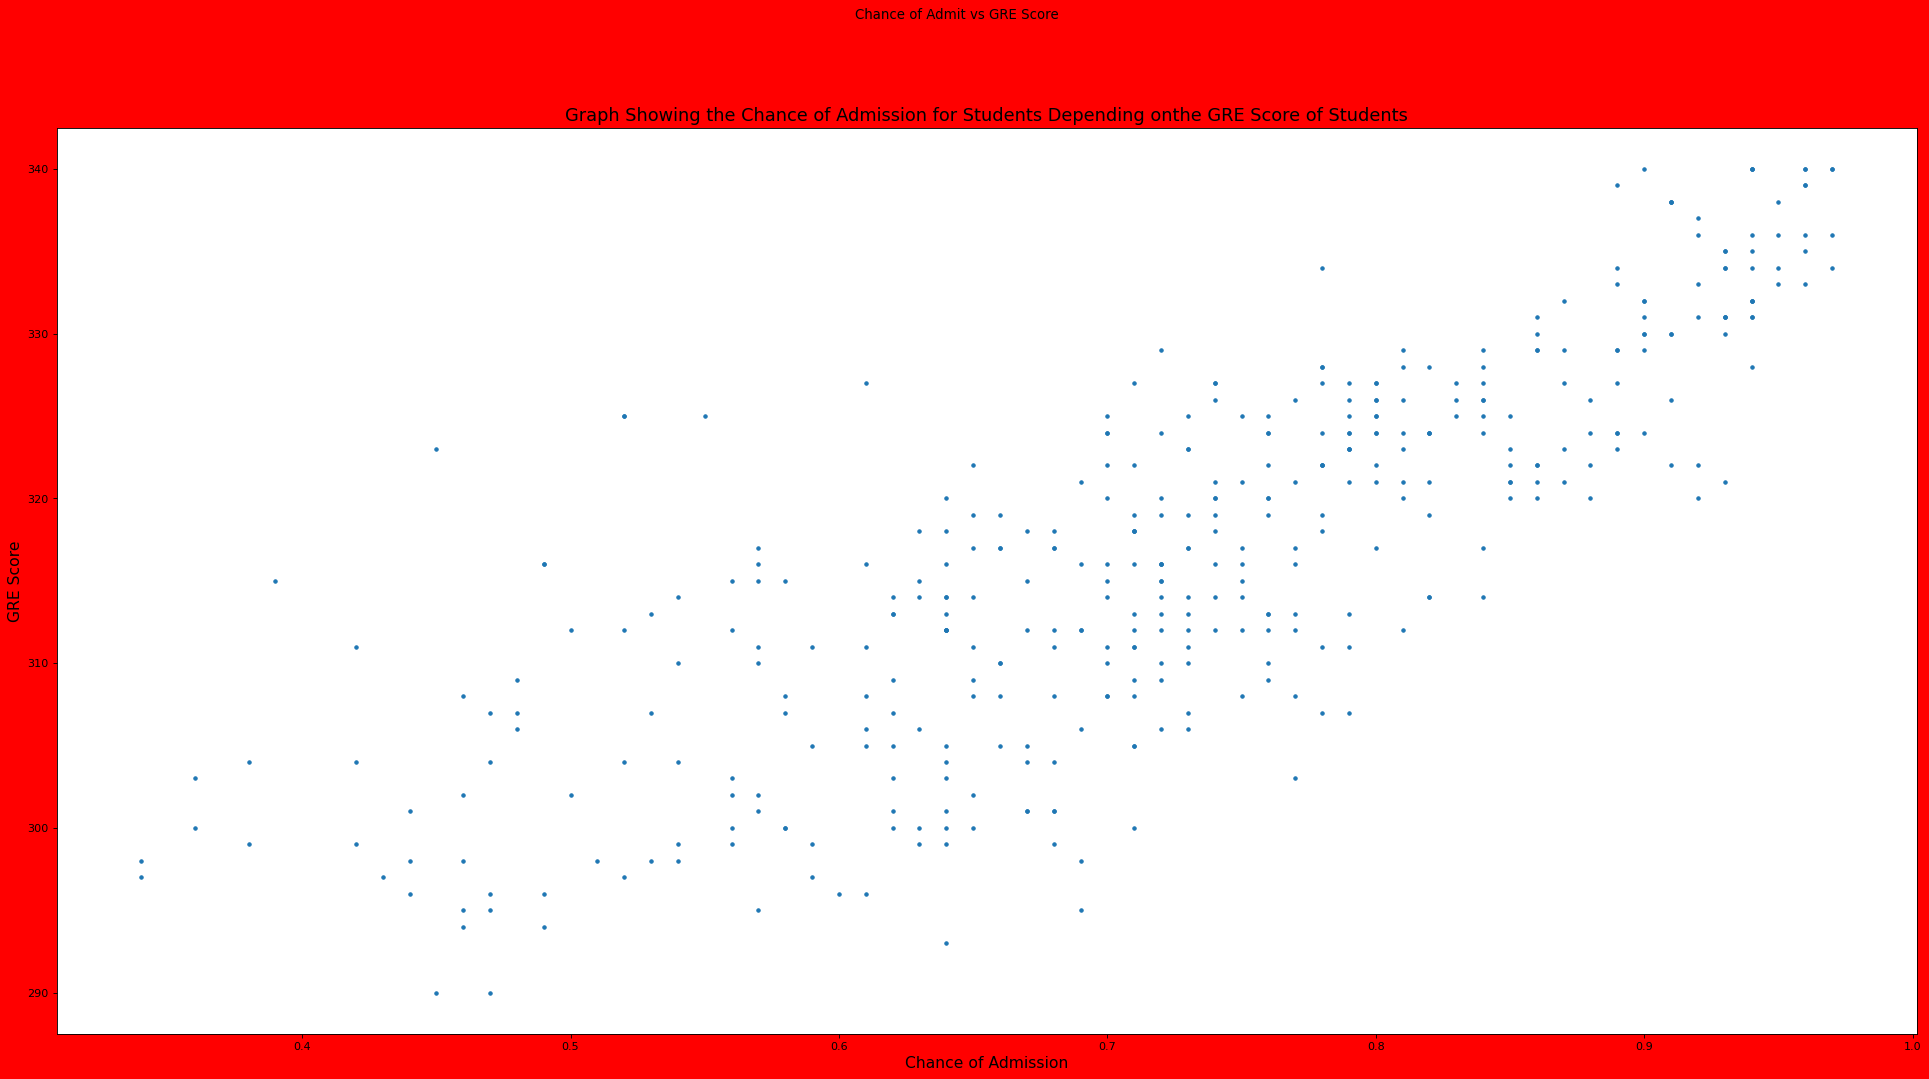

In [37]:
ChanceofAdmit = newadmin.iloc[:, [7]]
print(ChanceofAdmit)
plt.figure(figsize = (30, 15), facecolor = "red", dpi = 80)
plt.scatter(ChanceofAdmit, newadmin.iloc[:, [0]], marker = '.')
fontsize = 16
font = 14
plt.title("Graph Showing the Chance of Admission for Students Depending onthe GRE Score of Students", fontdict = {'fontsize': fontsize})
plt.xlabel("Chance of Admission", fontdict = {'fontsize': font})
plt.ylabel("GRE Score", fontdict = {'fontsize': font})
plt.suptitle("Chance of Admit vs GRE Score")
plt.show()

Text(0.5, 1.0, 'Graph of GRE Score of Students vs Chance Students Being Admitted in University')

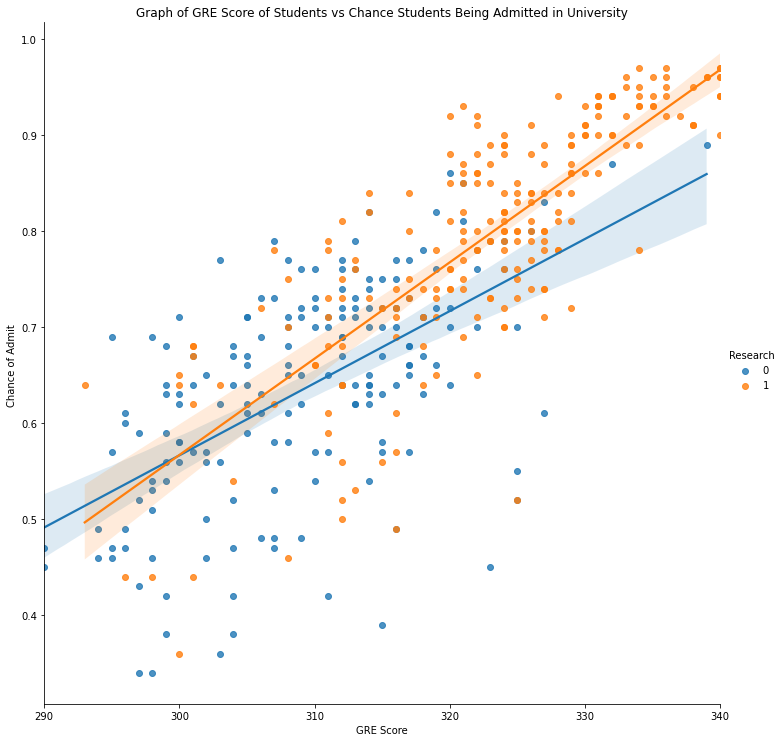

In [38]:
sns.lmplot(x = 'GRE Score', y = 'Chance of Admit ', data = newadmin,
          hue = 'Research', height = 10)
plt.title("Graph of GRE Score of Students vs Chance Students Being Admitted in University")

# Predictive Analysis

Import Libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [41]:
X = newadmin.drop(['Chance of Admit '], axis = 1)
print(X)
Y = newadmin['Chance of Admit ']
print(Y)

            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   
...               ...          ...                ...  ...   ...   ...   
396               324          110                  3  3.5   3.5  9.04   
397               325          107                  3  3.0   3.5  9.11   
398               330          116                  4  5.0   4.5  9.45   
399               312          103                  3  3.5   4.0  8.78   
400               333          117                  4  5.0   4.0  9.66   

            Research  
Serial No.    

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.25, random_state = 45)

# Linear Regression

In [44]:
# We are going to create a Linear Regression
linreg = LinearRegression()

# Let us fit the model
linreg.fit(X_train, Y_train)

# We also need to predict the model for test 
predlinreg = linreg.predict(X_test)

In [45]:
# Summary of Statistics for the Linear Regression
print('Percentage for Train Data : {}'.format(linreg.score(X_train, Y_train)))
print('\n')
print('Percentage for Test Data : {}'.format(linreg.score(X_test, Y_test)))
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predlinreg))
print('\n')
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predlinreg))
print('\n')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predlinreg)))
print('\n')

Percentage for Train Data : 0.7992989503571059


Percentage for Test Data : 0.812430106651476


Mean Absolute Error: 0.045077099879969794


Mean Squared Error: 0.0034276522310509273


Root Mean Squared Error: 0.05854615470764009




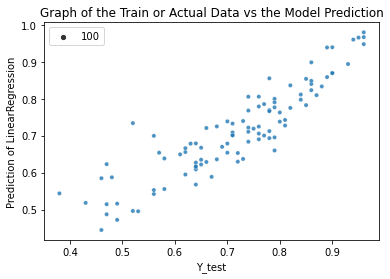

In [46]:
# Let us plot the model to see if it fits the testing data
sns.scatterplot(x = Y_test, y = predlinreg, size = (100), alpha = .8)
plt.xlabel('Y_test')
plt.ylabel('Prediction of LinearRegression')
plt.title("Graph of the Train or Actual Data vs the Model Prediction")
plt.show()

We cannot just settle for one regression. We need to look at the other ones to see which one is most fitting to the actual data¶


# KNN or K-Nearest Neighbors

In [47]:
# Start by creating the KNN Regression
neighbor = KNeighborsRegressor(n_neighbors = 2)

# Fit the model
neighbor.fit(X_train, Y_train)

# Predict the model for test data
predneighbor = neighbor.predict(X_test)

# Summary of Statistics for KNN Regressor

In [48]:
# Regression Summary for Model
print('Percent for Train Data : {}'.format(neighbor.score(X_train, Y_train)))
print('\n')
print('Percent for Test Data : {}'.format(neighbor.score(X_test, Y_test)))
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predneighbor))
print('\n')
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predneighbor))
print('\n')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predneighbor)))
print('\n')

Percent for Train Data : 0.8806693538915452


Percent for Test Data : 0.5631361497209149


Mean Absolute Error: 0.06695


Mean Squared Error: 0.007983249999999999


Root Mean Squared Error: 0.08934903468980512




# Plotting the KNNeighbor Regression

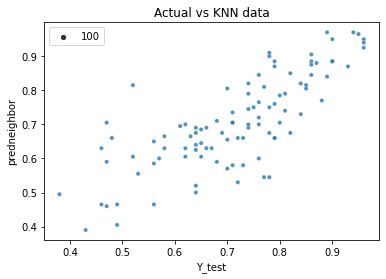

In [49]:
sns.scatterplot(x = Y_test, y = predneighbor, size = 100, alpha = .8)
plt.xlabel('Y_test')
plt.ylabel('predneighbor')
plt.title('Actual vs KNN data')
plt.show()

# Decision Tree Regression

In [50]:
# Create a Regression
trees = DecisionTreeRegressor()

# Fitting the model
trees.fit(X_train, Y_train)

# Predict for test data
predtree = trees.predict(X_test)

In [51]:
# Summary of Statistic
print('Percent for Train Data : {}'.format(trees.score(X_train, Y_train)))
print('\n')
print('Percent for Test Data: {}'.format(trees.score(X_test, Y_test)))
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predtree))
print('\n')
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predtree))
print('\n')
print('Root Mean Squared Error:', np.square(metrics.mean_squared_error(Y_test, predtree)))

Percent for Train Data : 1.0


Percent for Test Data: 0.4997811097734485


Mean Absolute Error: 0.06849999999999999


Mean Squared Error: 0.009141000000000002


Root Mean Squared Error: 8.355788100000003e-05


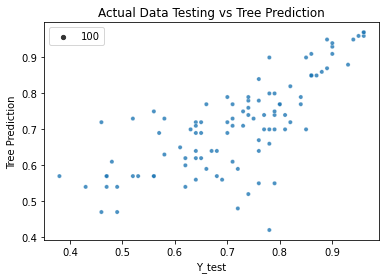

In [52]:
# Plotting the model
sns.scatterplot(x = Y_test, y = predtree, size = 100, alpha = .8)
plt.title('Actual Data Testing vs Tree Prediction')
plt.xlabel('Y_test')
plt.ylabel('Tree Prediction')
plt.show()

# Random Forest Regression

In [53]:
# Create a Regression
RFG = RandomForestRegressor(n_estimators = 100)

# Fitting the regression
RFG.fit(X_train, Y_train)

# Predict the value
predRFG = RFG.predict(X_test)

Percent for Train Data : 0.9647186022536923


Percent for Test Data : 0.7662563806501039


Mean Absolute Error: 0.048315000000000004


Mean Squared Error: 0.004271430899999999


Root Mean Squared Error: 0.06535618486417333




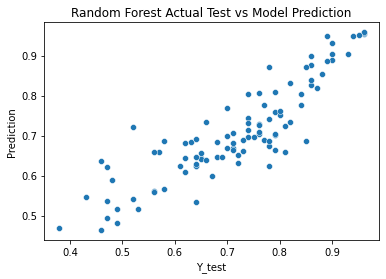

In [54]:
# Summary of Statistics
print('Percent for Train Data : {}'.format(RFG.score(X_train, Y_train)))
print('\n')
print('Percent for Test Data : {}'.format(RFG.score(X_test, Y_test)))
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predRFG))
print('\n')
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predRFG))
print('\n')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predRFG)))
print('\n')

# Plot

sns.scatterplot(x = Y_test, y = predRFG)
plt.title('Random Forest Actual Test vs Model Prediction')
plt.xlabel('Y_test')
plt.ylabel('Prediction')
plt.show()